# Name: keerthi priya

# Task_1 : prediction using supervised ML


# The task is assigned by The Spark Foundation

# In the field of Data Science & Business Analytics

### import libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
#import plotly.plotly as py
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
#For LR
import statsmodels.api as sm
#For LR That looks like R
import statsmodels.formula.api as smf
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
print("Packages LOADED")

Packages LOADED


###  Reading data

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Ploting the Data 

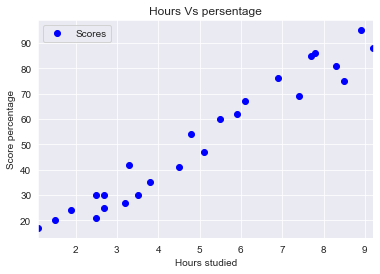

In [7]:
sns.set_style('darkgrid')
data.plot(x='Hours',y='Scores', style = 'o', c='b')
plt.xlabel('Hours studied')
plt.ylabel('Score percentage')
plt.title('Hours Vs persentage')
plt.legend()
plt.show()

### We can see, clearly the above relation is in positive linear relationship

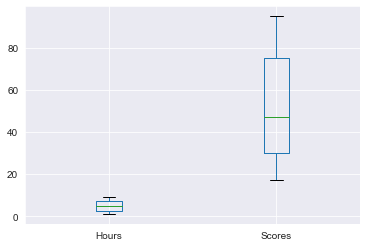

In [8]:
data.plot.box()
plt.show()

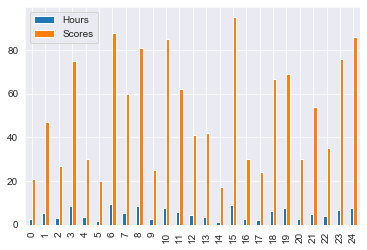

In [9]:
data.plot.bar()
plt.show()

## Dividing it into Attributes and Labels

In [10]:
X = data.iloc[:, :-1].values
X
y = data.iloc[:, 1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## Spliting the data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Algorithm 

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
X_train
X.shape
X = data.iloc[:, :-1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

## Ploting the regression line

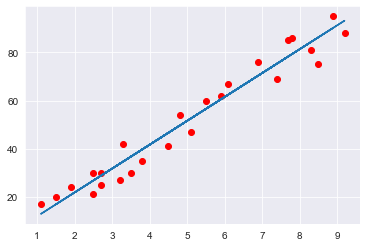

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [13]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, c='r')
plt.plot(X, line);
plt.show()

print(data.corr())

In [14]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [16]:
print(y_test)

[20 27 69 30 62]


In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


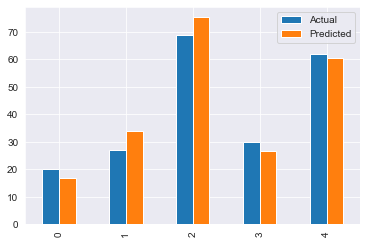

In [18]:
df.plot.bar()
plt.show()

In [19]:
Hours = [[9.25]]
own_pred = regressor.predict(Hours)
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


## EVALUATING THE PERFORMANCE OF THE MODEL 

In [20]:
print("Mean Absolute Error is : ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error is : ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error is : ", np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print("Slope of regression line ",regressor.coef_)
print("Y intercept of regression line",regressor.intercept_)

Mean Absolute Error is :  4.183859899002975
Mean Squared Error is :  21.5987693072174
Root Mean Squared Error is :  4.6474476121003665
Slope of regression line  [9.91065648]
Y intercept of regression line 2.018160041434683
